In [2]:
import pandas as pd
import numpy as np
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
Imputer_basic = Imputer()

In [4]:
# imputer basic will be simple imputation with mean imputation. in python we go by instances to make things easier.

In [4]:
np.random.seed(1234)
x = np.random.normal(10,5,100)
y = np.random.normal(50,30,100) + x**2
z = np.random.normal(30,50,100) + x+1.5*y

In [6]:
# here we are creating 3 variables(numpy arrays) x,y and z where mean of x=10,standard deviaiton=5 and we pick 100 random values. As the numbers are random,there should not be any relationship between x,y and z.

In [5]:
Data = np.matrix([x,y,z]).T

In [8]:
# we are converting the values of x,y and z into a matrix. If we are not using transpose of matrix, the matrix will become 3 rows with 100 columns.As they are one dimensional arrays.

In [9]:
Data.shape

(100, 3)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [7]:
# these are used only for visualization part.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


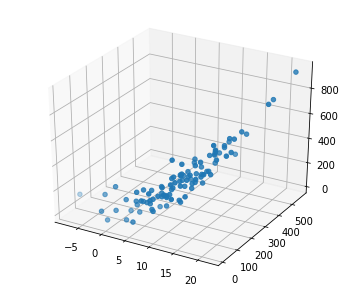

In [8]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Data[:,0],Data[:,1],Data[:,2])
fig.show()

In [13]:
# this is the visualization of the data points and we can infer that  they are very much scattered.It shows that x,y and z are independent of each other.

In [9]:
Data

matrix([[ 1.23571758e+01,  2.11435955e+02,  3.43533038e+02],
        [ 4.04512153e+00,  8.33590191e+01,  1.28083996e+02],
        [ 1.71635348e+01,  3.59694681e+02,  5.94555475e+02],
        [ 8.43674052e+00,  1.29737461e+02,  2.04470165e+02],
        [ 6.39705633e+00,  1.05450973e+02,  2.47455175e+02],
        [ 1.44358147e+01,  2.99297191e+02,  4.53807161e+02],
        [ 1.42979421e+01,  2.30997989e+02,  3.64563558e+02],
        [ 6.81738248e+00,  8.24361739e+01,  1.64065545e+02],
        [ 1.00784819e+01,  1.88313027e+02,  4.18085994e+02],
        [-1.21342477e+00,  1.30391514e+01,  8.77435365e+01],
        [ 1.57501786e+01,  3.24332392e+02,  5.57902874e+02],
        [ 1.49597301e+01,  2.22472065e+02,  3.51347014e+02],
        [ 1.47666206e+01,  2.54530132e+02,  4.78759051e+02],
        [-1.06274101e-01,  7.24862084e+01,  2.44012296e+02],
        [ 8.32961317e+00,  1.13264470e+02,  2.81222692e+02],
        [ 1.00105918e+01,  1.44746686e+02,  3.07900894e+02],
        [ 1.20272671e+01

In [16]:
np.random.seed(1234)
miss_col = np.random.randint(0,3,50)
miss_row = np.random.randint(0,100,50)
data = [Data[row,col] for row, col in zip(miss_row, miss_col)]
for row, col in zip(miss_row, miss_col):
    Data[row,col] = np.nan

In [17]:
# now the idea is to take some values in the matrix randomly and make them missing values.So we need to create the row index and col index for wihch the column values have to be missing.And then store the missing values to compare how the imputation is done.
# for the random values to be generated, in miss_col we are giving 0,3,50 it means the columns are 0,1,2. Since there are only 3 columns, we are using 3 columns randomly and for 50 sets.
# somilarly for row index , we have 100 rows so we take 0,100,50 as values.
# Whatever are the values in those column and row indices that is the missing values will be stored in 'data'.
# [Data[row,col] for row, col in zip(miss_row, miss_col)] is for list computation 

In [18]:
data

[300.2894261189575,
 191.1271684921433,
 16.959930967232037,
 10.822647714661993,
 5.514216077801507,
 215.07483301231045,
 89.9826082355907,
 204.67667896186435,
 187.0679840460777,
 164.30211626341793,
 187.0679840460777,
 13.836843678762058,
 11.238960998742733,
 306.35006322540306,
 365.9189929293778,
 331.7044038072421,
 11.076342904847216,
 16.605790960646928,
 7.849521545617562,
 157.81556926150841,
 4.655056082599339,
 178.23283462633015,
 363.9007651058557,
 164.06554523648285,
 239.92862202337048,
 14.435814701538693,
 10.091445956746096,
 181.3629236195996,
 307.90089417169327,
 393.25229190063214,
 557.9028735522098,
 9.084457299105006,
 105.45097311230614,
 16.60552807735103,
 484.0199994290801,
 9.276902458153078,
 180.89994288136023,
 426.43891975832906,
 266.6675621093657,
 317.533334898554,
 9.276902458153078,
 351.92920853062446,
 343.53303833509335,
 4.655056082599339,
 164.42544480060485,
 338.7495304552886,
 6.720153279305331,
 12.310298685810244,
 11.0594169338885

In [ ]:
# these are the values for row index and column index combinations which were replaced with missing values. in Data or original data set, we are replacing them with missing values that is 'nan' but we need to store them for analysing how the process works. So we store the missing values in 'data'.

In [32]:
data[:10]

[300.2894261189575,
 191.1271684921433,
 16.959930967232037,
 10.822647714661993,
 5.514216077801507,
 215.07483301231045,
 89.9826082355907,
 204.67667896186435,
 187.0679840460777,
 164.30211626341793]

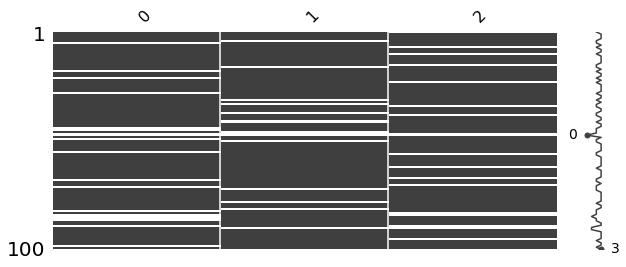

In [10]:
df = pd.DataFrame(Data)
mn.matrix(df, figsize=(10,4))

In [ ]:
# the above plot shows the distribution of missing data in each column. White lines shows missing values. This is the matrix form of indication 0,1,2 indicates columns and 1-100 indicates rows.

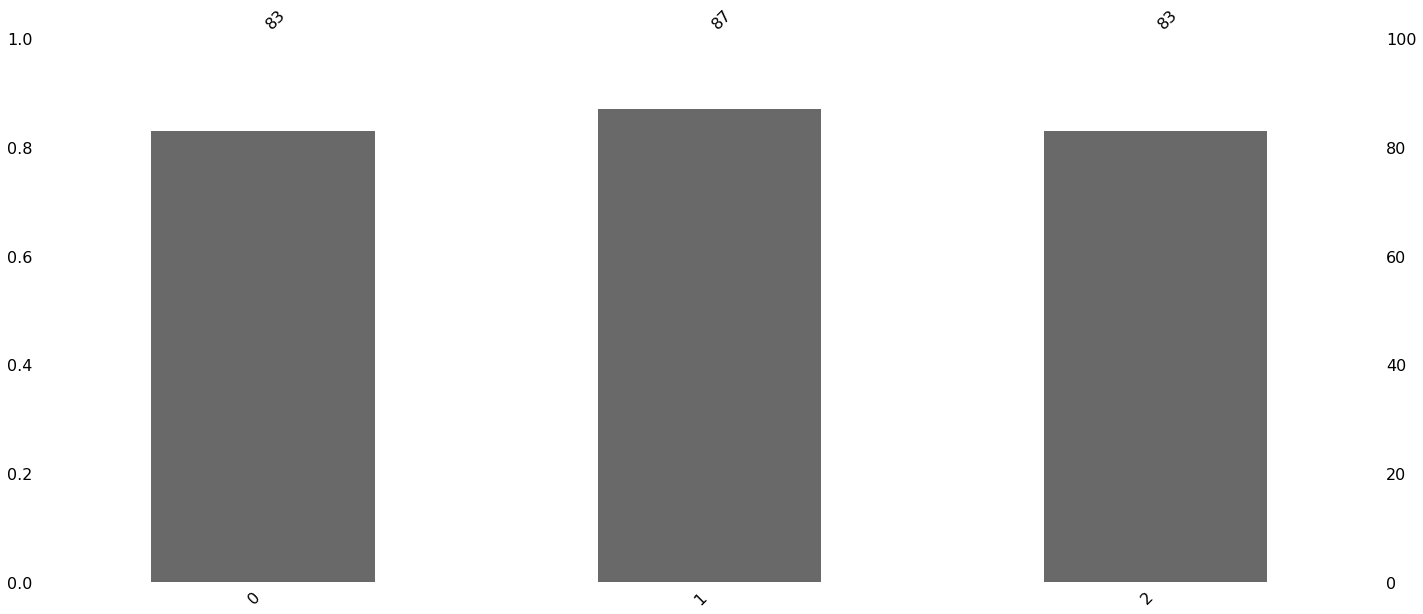

In [11]:
mn.bar(df)

In [ ]:
# we can say that there are 83 values in column 0, 87 values in column 1, 83 values in column 2.

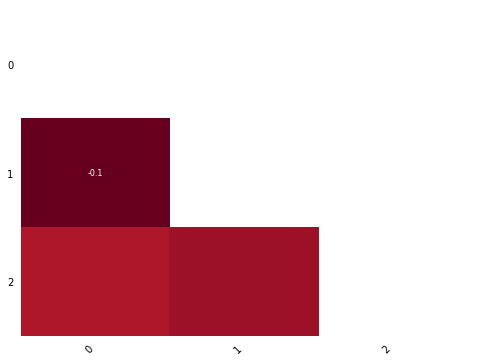

In [12]:
mn.heatmap(df,figsize=(8,6), fontsize=10)

In [ ]:
# we are finding out the correlation between the missingness of v1 and v2. From graph we can say it is very less that is 0.1(area corresponding to 0-1).For other cases it not less. Hence not mentioned. 
# the missing values are generated by random numbers so there should not be any correlation between all the variables.
# since correlation is not there, mice model or whatever model taken may not give good results.

In [13]:
Data0 = Imputer_basic.fit_transform(df)

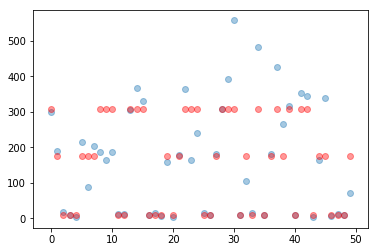

In [14]:
d0 = [Data0[r,c] for r,c in zip(miss_row, miss_col)]
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d0, c='red',alpha=0.4)
plt.show()

In [ ]:
# from the above graph we can make out that for all 3 variables the missing values are almost same. that is why in a straight line which is no way recommended.

In [15]:
YYY = fancyimpute.MICE(verbose=False)

In [16]:
Data1 = YYY.complete(Data)

In [17]:
d1 = [Data1[r,c] for r,c in zip(miss_row, miss_col)]

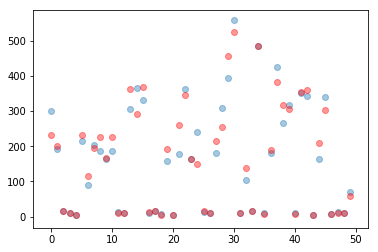

In [18]:
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d1, c='red',alpha=0.4)
plt.show()

In [ ]:
# we used mice technique here, and we are able to make out that there is some variation in the data of 3 variables wrt to the first graph or the first imputation technique.

In [19]:
ZZZ = fancyimpute.IterativeSVD(rank=1, verbose=False)

In [ ]:
# iterative svd is also algoritmic based imputation technique. Here we are reducing the rank from 3 to 1 that is low rank approximation. 

In [20]:
Data2 = ZZZ.complete(Data)

/home/subhasis/anaconda3/lib/python3.5/site-packages/fancyimpute/iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [21]:
d2 = [Data2[r,c] for r,c in zip(miss_row, miss_col)]

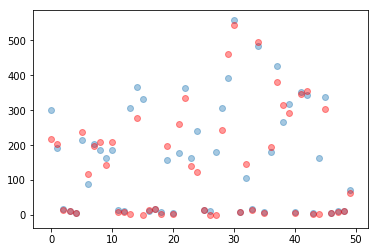

In [22]:
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d2, c='red', alpha=0.4)
plt.show()

In [ ]:
# using this technique, we are able to capture the variability but at some points the variablity is very high.

In [23]:
AAA = fancyimpute.SoftImpute(verbose=False)

In [ ]:
# soft impute is faster than iterative svd.Iterative svd is mot much used for larger data sets. In such cases, soft impute is preferred.

In [24]:
Data3 = AAA.complete(Data)

/home/subhasis/anaconda3/lib/python3.5/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [25]:
d3 = [[Data3[r,c] for r,c in zip(miss_row, miss_col)]]

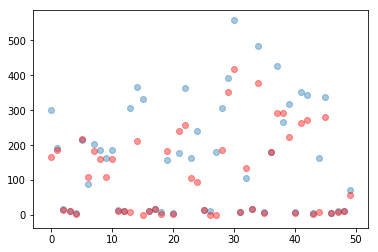

In [26]:
plt.scatter(x=range(len(data)),y = data,alpha=0.4)
plt.scatter(x=range(len(data)),y = d3, c='red', alpha=0.4)
plt.show()

In [27]:
BBB = fancyimpute.MatrixFactorization(rank=3, verbose=False)

In [28]:
Data4 = BBB.complete(Data)

Train on 227 samples, validate on 26 samples
Epoch 1/10000
 - 0s - loss: 1.2023 - val_loss: 0.8850
Epoch 2/10000
 - 0s - loss: 1.1986 - val_loss: 0.8842
Epoch 3/10000
 - 0s - loss: 1.1959 - val_loss: 0.8834
Epoch 4/10000
 - 0s - loss: 1.1934 - val_loss: 0.8827
Epoch 5/10000
 - 0s - loss: 1.1909 - val_loss: 0.8819
Epoch 6/10000
 - 0s - loss: 1.1884 - val_loss: 0.8811
Epoch 7/10000
 - 0s - loss: 1.1858 - val_loss: 0.8803
Epoch 8/10000
 - 0s - loss: 1.1832 - val_loss: 0.8794
Epoch 9/10000
 - 0s - loss: 1.1805 - val_loss: 0.8785
Epoch 10/10000
 - 0s - loss: 1.1776 - val_loss: 0.8776
Epoch 11/10000
 - 0s - loss: 1.1748 - val_loss: 0.8766
Epoch 12/10000
 - 0s - loss: 1.1720 - val_loss: 0.8756
Epoch 13/10000
 - 0s - loss: 1.1692 - val_loss: 0.8746
Epoch 14/10000
 - 0s - loss: 1.1663 - val_loss: 0.8735
Epoch 15/10000
 - 0s - loss: 1.1634 - val_loss: 0.8724
Epoch 16/10000
 - 0s - loss: 1.1605 - val_loss: 0.8713
Epoch 17/10000
 - 0s - loss: 1.1576 - val_loss: 0.8701
Epoch 18/10000
 - 0s - loss: 

Epoch 149/10000
 - 0s - loss: 0.8517 - val_loss: 0.6881
Epoch 150/10000
 - 0s - loss: 0.8499 - val_loss: 0.6869
Epoch 151/10000
 - 0s - loss: 0.8482 - val_loss: 0.6856
Epoch 152/10000
 - 0s - loss: 0.8464 - val_loss: 0.6844
Epoch 153/10000
 - 0s - loss: 0.8447 - val_loss: 0.6832
Epoch 154/10000
 - 0s - loss: 0.8429 - val_loss: 0.6820
Epoch 155/10000
 - 0s - loss: 0.8412 - val_loss: 0.6808
Epoch 156/10000
 - 0s - loss: 0.8394 - val_loss: 0.6796
Epoch 157/10000
 - 0s - loss: 0.8377 - val_loss: 0.6784
Epoch 158/10000
 - 0s - loss: 0.8360 - val_loss: 0.6772
Epoch 159/10000
 - 0s - loss: 0.8342 - val_loss: 0.6760
Epoch 160/10000
 - 0s - loss: 0.8325 - val_loss: 0.6749
Epoch 161/10000
 - 0s - loss: 0.8308 - val_loss: 0.6737
Epoch 162/10000
 - 0s - loss: 0.8291 - val_loss: 0.6725
Epoch 163/10000
 - 0s - loss: 0.8274 - val_loss: 0.6713
Epoch 164/10000
 - 0s - loss: 0.8257 - val_loss: 0.6701
Epoch 165/10000
 - 0s - loss: 0.8240 - val_loss: 0.6690
Epoch 166/10000
 - 0s - loss: 0.8223 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6251 - val_loss: 0.5374
Epoch 297/10000
 - 0s - loss: 0.6237 - val_loss: 0.5365
Epoch 298/10000
 - 0s - loss: 0.6222 - val_loss: 0.5356
Epoch 299/10000
 - 0s - loss: 0.6208 - val_loss: 0.5348
Epoch 300/10000
 - 0s - loss: 0.6194 - val_loss: 0.5339
Epoch 301/10000
 - 0s - loss: 0.6179 - val_loss: 0.5331
Epoch 302/10000
 - 0s - loss: 0.6165 - val_loss: 0.5322
Epoch 303/10000
 - 0s - loss: 0.6151 - val_loss: 0.5314
Epoch 304/10000
 - 0s - loss: 0.6137 - val_loss: 0.5305
Epoch 305/10000
 - 0s - loss: 0.6122 - val_loss: 0.5296
Epoch 306/10000
 - 0s - loss: 0.6108 - val_loss: 0.5288
Epoch 307/10000
 - 0s - loss: 0.6094 - val_loss: 0.5280
Epoch 308/10000
 - 0s - loss: 0.6079 - val_loss: 0.5271
Epoch 309/10000
 - 0s - loss: 0.6065 - val_loss: 0.5263
Epoch 310/10000
 - 0s - loss: 0.6051 - val_loss: 0.5254
Epoch 311/10000
 - 0s - loss: 0.6037 - val_loss: 0.5246
Epoch 312/10000
 - 0s - loss: 0.6022 - val_loss: 0.5237
Epoch 313/10000
 - 0s - loss: 0.6008 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4190 - val_loss: 0.4179
Epoch 444/10000
 - 0s - loss: 0.4177 - val_loss: 0.4171
Epoch 445/10000
 - 0s - loss: 0.4164 - val_loss: 0.4163
Epoch 446/10000
 - 0s - loss: 0.4150 - val_loss: 0.4155
Epoch 447/10000
 - 0s - loss: 0.4137 - val_loss: 0.4147
Epoch 448/10000
 - 0s - loss: 0.4124 - val_loss: 0.4139
Epoch 449/10000
 - 0s - loss: 0.4111 - val_loss: 0.4130
Epoch 450/10000
 - 0s - loss: 0.4098 - val_loss: 0.4122
Epoch 451/10000
 - 0s - loss: 0.4084 - val_loss: 0.4114
Epoch 452/10000
 - 0s - loss: 0.4071 - val_loss: 0.4106
Epoch 453/10000
 - 0s - loss: 0.4058 - val_loss: 0.4098
Epoch 454/10000
 - 0s - loss: 0.4045 - val_loss: 0.4090
Epoch 455/10000
 - 0s - loss: 0.4032 - val_loss: 0.4082
Epoch 456/10000
 - 0s - loss: 0.4019 - val_loss: 0.4074
Epoch 457/10000
 - 0s - loss: 0.4006 - val_loss: 0.4066
Epoch 458/10000
 - 0s - loss: 0.3993 - val_loss: 0.4058
Epoch 459/10000
 - 0s - loss: 0.3980 - val_loss: 0.4050
Epoch 460/10000
 - 0s - loss: 0.3967 - val_loss:

Epoch 590/10000
 - 0s - loss: 0.2516 - val_loss: 0.3052
Epoch 591/10000
 - 0s - loss: 0.2507 - val_loss: 0.3045
Epoch 592/10000
 - 0s - loss: 0.2498 - val_loss: 0.3038
Epoch 593/10000
 - 0s - loss: 0.2489 - val_loss: 0.3031
Epoch 594/10000
 - 0s - loss: 0.2480 - val_loss: 0.3024
Epoch 595/10000
 - 0s - loss: 0.2471 - val_loss: 0.3018
Epoch 596/10000
 - 0s - loss: 0.2462 - val_loss: 0.3011
Epoch 597/10000
 - 0s - loss: 0.2453 - val_loss: 0.3004
Epoch 598/10000
 - 0s - loss: 0.2444 - val_loss: 0.2997
Epoch 599/10000
 - 0s - loss: 0.2435 - val_loss: 0.2991
Epoch 600/10000
 - 0s - loss: 0.2426 - val_loss: 0.2984
Epoch 601/10000
 - 0s - loss: 0.2418 - val_loss: 0.2977
Epoch 602/10000
 - 0s - loss: 0.2409 - val_loss: 0.2971
Epoch 603/10000
 - 0s - loss: 0.2400 - val_loss: 0.2964
Epoch 604/10000
 - 0s - loss: 0.2392 - val_loss: 0.2958
Epoch 605/10000
 - 0s - loss: 0.2383 - val_loss: 0.2951
Epoch 606/10000
 - 0s - loss: 0.2374 - val_loss: 0.2944
Epoch 607/10000
 - 0s - loss: 0.2366 - val_loss:

Epoch 737/10000
 - 0s - loss: 0.1503 - val_loss: 0.2245
Epoch 738/10000
 - 0s - loss: 0.1498 - val_loss: 0.2241
Epoch 739/10000
 - 0s - loss: 0.1494 - val_loss: 0.2237
Epoch 740/10000
 - 0s - loss: 0.1489 - val_loss: 0.2233
Epoch 741/10000
 - 0s - loss: 0.1484 - val_loss: 0.2229
Epoch 742/10000
 - 0s - loss: 0.1479 - val_loss: 0.2225
Epoch 743/10000
 - 0s - loss: 0.1474 - val_loss: 0.2221
Epoch 744/10000
 - 0s - loss: 0.1469 - val_loss: 0.2217
Epoch 745/10000
 - 0s - loss: 0.1465 - val_loss: 0.2213
Epoch 746/10000
 - 0s - loss: 0.1460 - val_loss: 0.2209
Epoch 747/10000
 - 0s - loss: 0.1455 - val_loss: 0.2205
Epoch 748/10000
 - 0s - loss: 0.1451 - val_loss: 0.2201
Epoch 749/10000
 - 0s - loss: 0.1446 - val_loss: 0.2198
Epoch 750/10000
 - 0s - loss: 0.1441 - val_loss: 0.2194
Epoch 751/10000
 - 0s - loss: 0.1437 - val_loss: 0.2190
Epoch 752/10000
 - 0s - loss: 0.1432 - val_loss: 0.2186
Epoch 753/10000
 - 0s - loss: 0.1427 - val_loss: 0.2182
Epoch 754/10000
 - 0s - loss: 0.1423 - val_loss:

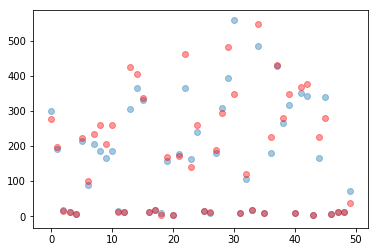

In [29]:
d4 = [[Data4[r,c] for r,c in zip(miss_row, miss_col)]]
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d4, c='red',alpha=0.4)
plt.show()

In [30]:
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d1)))/len(data)))
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d2)))/len(data)))
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d3)))/len(data)))

32.83846714175795
79.86048146357179
93.22908964476734


In [ ]:
# here we are computing the root mean square error (RMSE). for d1 it is 32, for d2 it is 79 and for d3 it is 93. So we can infer that mice is performing good when compared to others as the error is less. 

In [34]:
auto_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
auto = pd.read_csv(auto_path, header=None,na_values="?")
auto_varnames = ['symboling','normalized_losses','make','fuel_type','aspiration',
                        'num_of_doors','body_style','drive_wheels','engine_location',
                        'wheel_base','length','width','height','curb_weight','engine_type',
                        'num_of_cylinders','engine_size','fuel_system','bore','stroke',
                        'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
auto.columns = auto_varnames

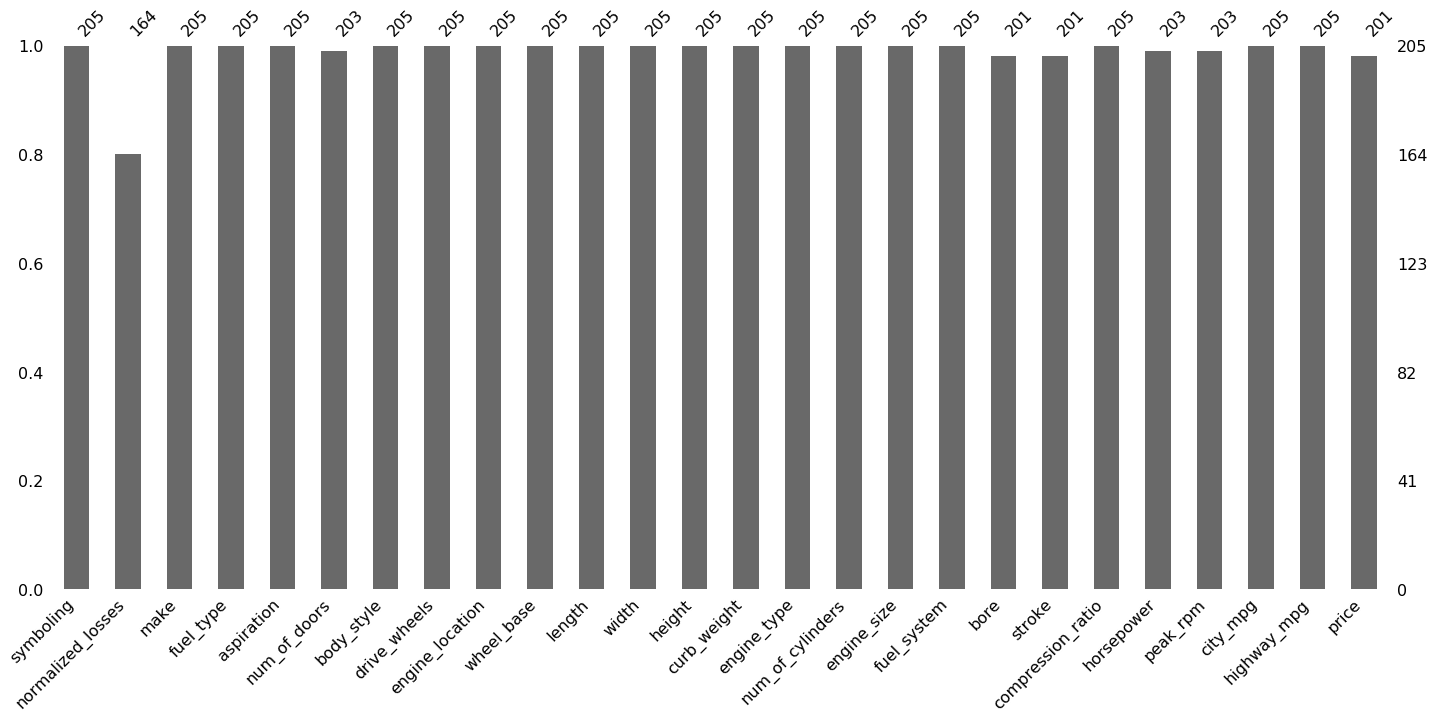

In [35]:
mn.bar(auto)

In [ ]:
# For practical data sets, for MICE it takes matrix as input. But we know that matrix should contain only values of same data type. Here in auto dataset, some variables are objects. Hence we should convert all the values to numerical values or in other terms one hot inputting is required.

In [36]:
pd.get_dummies(auto).shape

(205, 76)

In [37]:
YYY.complete(pd.get_dummies(auto))

array([[  3.        , 123.42385511,  88.6       , ...,   1.        ,
          0.        ,   0.        ],
       [  3.        , 136.17141676,  88.6       , ...,   1.        ,
          0.        ,   0.        ],
       [  1.        , 121.21317915,  94.5       , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [ -1.        ,  95.        , 109.1       , ...,   1.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        , 109.1       , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        , 109.1       , ...,   1.        ,
          0.        ,   0.        ]])

In [ ]:
# the dummies function converts the entire data set into one hot input type.